# MNIST Exercice

> Enzo Sergiani


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.where(X_train > 0, 1, 0)
X_test = np.where(X_test > 0, 1, 0)

unique, counts = np.unique(X_train, return_counts=True)
print("Training set distribution:")
print("Number of 0s in training set:", counts[0])
print("Number of 1s in training set:", counts[1])

print("\n")

unique, counts = np.unique(X_test, return_counts=True)
print("Test set distribution:")
print("Number of 0s in test set:", counts[0])
print("Number of 1s in test set:", counts[1])

Training set distribution:
Number of 0s in training set: 38045844
Number of 1s in training set: 8994156


Test set distribution:
Number of 0s in test set: 6328781
Number of 1s in test set: 1511219


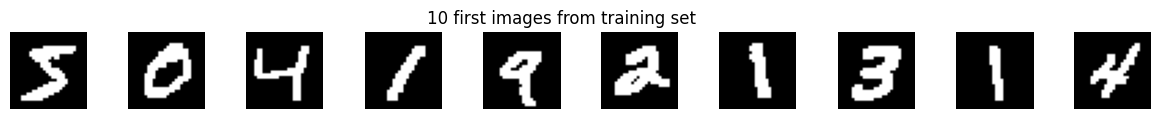

In [111]:
fig, axes = plt.subplots(1, 10, figsize=(15, 1))
for i in range(10):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].axis("off")
fig.suptitle("10 first images from training set", y=1.1)
plt.show()

In [112]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7932 - loss: 0.7439 - val_accuracy: 0.9049 - val_loss: 0.3221


In [114]:
def get_accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)


y_pred = np.argmax(model.predict(X_test), axis=1)
TP = np.sum((y_pred == 1) & (y_test == 1))
TN = np.sum((y_pred == 0) & (y_test == 0))
FP = np.sum((y_pred == 1) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1))

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

accuracy = get_accuracy(TP, TN, FP, FN)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
True Positives: 1106
True Negatives: 949
False Positives: 0
False Negatives: 0
Accuracy: 1.0


In [115]:
fp_indices = np.where((y_pred == 1) & (y_test == 0))[0][:5]
tn_indices = np.where((y_pred == 0) & (y_test == 0))[0][:5]


if fp_indices.size != 0 and tn_indices.size != 0:
    fig, axes = plt.subplots(1, 5, figsize=(15, 1))
    for i, idx in enumerate(fp_indices):
        axes[i].imshow(X_test[idx], cmap="gray")
        axes[i].axis("off")
    fig.suptitle("5 False Positives", y=1.1)
    plt.show()

    # Plot TN images
    fig, axes = plt.subplots(1, 5, figsize=(15, 1))
    for i, idx in enumerate(tn_indices):
        axes[i].imshow(X_test[idx], cmap="gray")
        axes[i].axis("off")
    fig.suptitle("5 True Negatives", y=1.1)
    plt.show()
else:
    print("No 5 False Positives and 5 True Negatives found.")

No 5 False Positives and 5 True Negatives found.


In [116]:
def count_non_zero_pixels(image):
    return np.count_nonzero(image)


zero_img = X_train[1]
one_img = X_train[3]

zero_img_non_zero = count_non_zero_pixels(zero_img)
one_img_non_zero = count_non_zero_pixels(one_img)

print("Number of non-zero pixels in image of 0:", zero_img_non_zero)
print("Number of non-zero pixels in image of 1:", one_img_non_zero)

Number of non-zero pixels in image of 0: 176
Number of non-zero pixels in image of 1: 96


In [117]:
X_train_1D = np.array([count_non_zero_pixels(img) for img in X_train])
X_test_1D = np.array([count_non_zero_pixels(img) for img in X_test])

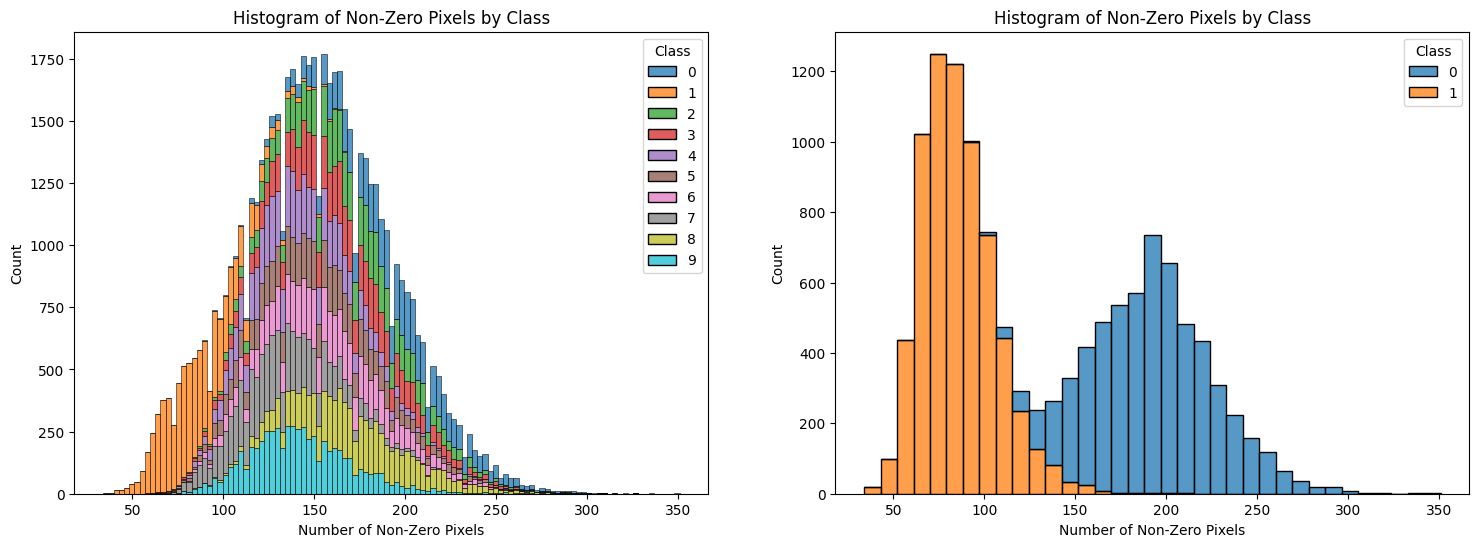

In [118]:
df_train = pd.DataFrame({"NonZeroPixels": X_train_1D, "Class": y_train})

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(
    data=df_train, x="NonZeroPixels", hue="Class", multiple="stack", palette="tab10"
)
plt.title("Histogram of Non-Zero Pixels by Class")
plt.xlabel("Number of Non-Zero Pixels")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(
    data=df_train[df_train["Class"].isin([0, 1])],
    x="NonZeroPixels",
    hue="Class",
    multiple="stack",
    palette="tab10",
)
plt.title("Histogram of Non-Zero Pixels by Class")
plt.xlabel("Number of Non-Zero Pixels")
plt.ylabel("Count")

plt.show()

In [ ]:
def is_zero_img(image):
    return 1 if count_non_zero_pixels(image) > 150 else 0


print("Is zero image a 1?:", is_zero_img(zero_img) == 1)
print("Is one image a 1?:", is_zero_img(one_img) == 1)

Is zero image a 1?: True
Is one image a 1?: False


In [ ]:
zero_one_indices = np.where((y_test == 0) | (y_test == 1))[0]
zero_one_images = X_test[zero_one_indices]
zero_one_labels = y_test[zero_one_indices]

zero_one_predictions = np.argmax(model.predict(zero_one_images), axis=1)

zero_one_accuracy = np.mean(zero_one_predictions == zero_one_labels)
print("Accuracy for zeros and ones:", zero_one_accuracy)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
Accuracy for zeros and ones: 0.9716312056737588
